In [91]:
# Importing Libraries
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
from tensorflow.keras import regularizers
import joblib

In [92]:
df = pd.read_csv('data_pendanaan.csv')
df.head(50)

,Nama UMKM,Produk Utama,Total Aset (Juta),Penjualan Rata-rata Per Tahun (Juta),Jumlah Tenaga Kerja,Nama Badan Hukum,Kategori,Sistem Penjualan,Target Pasar,Proyeksi Pertumbuhan (%/tahun),Kebutuhan Biaya Kredit (Juta),Nilai Aset Jaminan Kredit,Jumlah Dokumen Kredit,Label,pendanaan
0,Kios Perancangan,Pupuk,361.000,400.00,1,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,25.0,6.0,0.0,5,LAYAK,742.784482
1,LAPAK BAHTERA AYAM POTONG,DAGANG,44.600,576.00,1,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,30.0,9.0,15.0,3,LAYAK,736.831780
2,Budidaya Jamur Tiram,Budidaya Jamur tiram,15.300,36.00,1,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 sd 10 j...,10.0,10.0,30.0,6,TIDAK LAYAK,66.510918
3,Holtikultura Srimulyanti,Holtikultura,125.800,75.60,3,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Memenuhi Order Dari Distributor/Eksportir/Trad...,125.8,3.0,92.0,12,LAYAK,226.430582
4,Toko Pertanian Bu Siswarsini,Toko pertanian,218.000,84.00,2,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 sd 10 j...,5.0,9.5,39.0,7,TIDAK LAYAK,261.417527
5,Bangga Aquatic,Ikan hias,69.400,28.80,1,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel dan Distributor,Masyarakat Gol Bawah (penghasilan sd 5 sd 10 j...,15.0,5.0,200.0,9,LAYAK,105.023620
6,Itama Mandiri,madu kelulut,51.100,34.56,2,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 sd 10 j...,30.0,10.0,50.0,8,LAYAK,112.847246
7,Jual Beli Kopi Sanusi,Tani Kopi,90.000,22.00,4,Perorangan,Pertanian. Kehutanan Dan Perikanan,Distributor,Memenuhi Order Dari Distributor/Eksportir/Trad...,22.0,20.0,120.0,4,TIDAK LAYAK,110.785442
8,Amri Anugerah,Budidaya Ikan Lele,27.500,40.50,2,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,10.0,2.0,13.0,8,LAYAK,83.441730
9,HASIL TANI SEJAHTERA,PADI,2130.500,54.00,3,Perorangan,Pertanian. Kehutanan Dan Perikanan,Distributor,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,20.0,10.0,10.0,8,TIDAK LAYAK,1554.658818


In [93]:
# shape of the dataset
df.shape

(1025, 15)

In [94]:
df

,Nama UMKM,Produk Utama,Total Aset (Juta),Penjualan Rata-rata Per Tahun (Juta),Jumlah Tenaga Kerja,Nama Badan Hukum,Kategori,Sistem Penjualan,Target Pasar,Proyeksi Pertumbuhan (%/tahun),Kebutuhan Biaya Kredit (Juta),Nilai Aset Jaminan Kredit,Jumlah Dokumen Kredit,Label,pendanaan
0,Kios Perancangan,Pupuk,361.0,400.0,1,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,25.0,6.0,0.0,5,LAYAK,742.784482
1,LAPAK BAHTERA AYAM POTONG,DAGANG,44.6,576.0,1,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,30.0,9.0,15.0,3,LAYAK,736.831780
2,Budidaya Jamur Tiram,Budidaya Jamur tiram,15.3,36.0,1,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 sd 10 j...,10.0,10.0,30.0,6,TIDAK LAYAK,66.510918
3,Holtikultura Srimulyanti,Holtikultura,125.8,75.6,3,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Memenuhi Order Dari Distributor/Eksportir/Trad...,125.8,3.0,92.0,12,LAYAK,226.430582
4,Toko Pertanian Bu Siswarsini,Toko pertanian,218.0,84.0,2,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 sd 10 j...,5.0,9.5,39.0,7,TIDAK LAYAK,261.417527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,Ria Celluler,Pulsa,132.0,75.0,1,Perorangan,Kegiatan Jasa Lainnya,Retail,Tidak ada 0 %,0.0,50.0,132.0,5,TIDAK LAYAK,190.192815
1021,Toko Emas Sejahtera,Emas,200.0,80.0,2,Perorangan,Kegiatan Jasa Lainnya,Retail,Tidak ada 0 %,0.0,50.0,200.0,6,TIDAK LAYAK,253.113620
1022,CV Percetakan Offset,Spanduk Formulir,90.0,500.0,5,CV,Kegiatan Jasa Lainnya,Retail,Tidak ada 0 %,0.0,100.0,90.0,4,LAYAK,675.905274
1023,Warkop,Bensin,50.0,60.0,2,Perorangan,Kegiatan Jasa Lainnya,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,0.0,10.0,50.0,6,TIDAK LAYAK,116.475490


In [95]:
df.columns = map(str.lower, df.columns)

In [96]:
df.rename(columns= {"nama umkm":"umkm","produk utama":"produk_utama","total aset (juta)":"total_aset(jt)","penjualan rata-rata per tahun (juta)":"penjualan_rata-rata(tahun/jt)","jumlah tenaga kerja":"tenaga_kerja","nama badan hukum":"badan_hukum","sistem penjualan":"sistem_penjualan","target pasar":"target_pasar","proyeksi pertumbuhan (%/tahun)":"proyeksi_pertumbuhan(tahun)","kebutuhan biaya kredit (juta)":"kebutuhan_kredit(jt)","nilai aset jaminan kredit":"aset_jaminan_kredit","jumlah dokumen kredit":"jumlah_dokumen_kredit","label":"status"}, inplace = True)

In [97]:
df

,umkm,produk_utama,total_aset(jt),penjualan_rata-rata(tahun/jt),tenaga_kerja,badan_hukum,kategori,sistem_penjualan,target_pasar,proyeksi_pertumbuhan(tahun),kebutuhan_kredit(jt),aset_jaminan_kredit,jumlah_dokumen_kredit,status,pendanaan
0,Kios Perancangan,Pupuk,361.0,400.0,1,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,25.0,6.0,0.0,5,LAYAK,742.784482
1,LAPAK BAHTERA AYAM POTONG,DAGANG,44.6,576.0,1,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,30.0,9.0,15.0,3,LAYAK,736.831780
2,Budidaya Jamur Tiram,Budidaya Jamur tiram,15.3,36.0,1,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 sd 10 j...,10.0,10.0,30.0,6,TIDAK LAYAK,66.510918
3,Holtikultura Srimulyanti,Holtikultura,125.8,75.6,3,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Memenuhi Order Dari Distributor/Eksportir/Trad...,125.8,3.0,92.0,12,LAYAK,226.430582
4,Toko Pertanian Bu Siswarsini,Toko pertanian,218.0,84.0,2,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 sd 10 j...,5.0,9.5,39.0,7,TIDAK LAYAK,261.417527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,Ria Celluler,Pulsa,132.0,75.0,1,Perorangan,Kegiatan Jasa Lainnya,Retail,Tidak ada 0 %,0.0,50.0,132.0,5,TIDAK LAYAK,190.192815
1021,Toko Emas Sejahtera,Emas,200.0,80.0,2,Perorangan,Kegiatan Jasa Lainnya,Retail,Tidak ada 0 %,0.0,50.0,200.0,6,TIDAK LAYAK,253.113620
1022,CV Percetakan Offset,Spanduk Formulir,90.0,500.0,5,CV,Kegiatan Jasa Lainnya,Retail,Tidak ada 0 %,0.0,100.0,90.0,4,LAYAK,675.905274
1023,Warkop,Bensin,50.0,60.0,2,Perorangan,Kegiatan Jasa Lainnya,Retail,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,0.0,10.0,50.0,6,TIDAK LAYAK,116.475490


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   umkm                           1025 non-null   object 
 1   produk_utama                   1025 non-null   object 
 2   total_aset(jt)                 1025 non-null   float64
 3   penjualan_rata-rata(tahun/jt)  1025 non-null   float64
 4   tenaga_kerja                   1025 non-null   int64  
 5   badan_hukum                    1025 non-null   object 
 6   kategori                       1025 non-null   object 
 7   sistem_penjualan               1024 non-null   object 
 8   target_pasar                   1025 non-null   object 
 9   proyeksi_pertumbuhan(tahun)    1025 non-null   float64
 10  kebutuhan_kredit(jt)           1025 non-null   float64
 11  aset_jaminan_kredit            1025 non-null   float64
 12  jumlah_dokumen_kredit          1025 non-null   i

In [99]:
# Finding Missing Data
df.isnull().sum()

umkm                             0
produk_utama                     0
total_aset(jt)                   0
penjualan_rata-rata(tahun/jt)    0
tenaga_kerja                     0
badan_hukum                      0
kategori                         0
sistem_penjualan                 1
target_pasar                     0
proyeksi_pertumbuhan(tahun)      0
kebutuhan_kredit(jt)             0
aset_jaminan_kredit              0
jumlah_dokumen_kredit            0
status                           0
pendanaan                        0
dtype: int64

In [100]:
# melihat persen data null masing-masing kolom dari keseluruhan data
percent_missing = (df.isnull().sum() / len(df)) * 100/100
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
umkm,0.000000
produk_utama,0.000000
total_aset(jt),0.000000
penjualan_rata-rata(tahun/jt),0.000000
tenaga_kerja,0.000000
badan_hukum,0.000000
kategori,0.000000
sistem_penjualan,0.000976
target_pasar,0.000000
proyeksi_pertumbuhan(tahun),0.000000


In [101]:
# Remove Missing Values
df.dropna(inplace=True)

In [102]:
# Check Null Values
df.isna().sum()

umkm                             0
produk_utama                     0
total_aset(jt)                   0
penjualan_rata-rata(tahun/jt)    0
tenaga_kerja                     0
badan_hukum                      0
kategori                         0
sistem_penjualan                 0
target_pasar                     0
proyeksi_pertumbuhan(tahun)      0
kebutuhan_kredit(jt)             0
aset_jaminan_kredit              0
jumlah_dokumen_kredit            0
status                           0
pendanaan                        0
dtype: int64

In [103]:
# Check for Duplicate Data
df.duplicated().sum()

0

In [104]:
# Delete all duplicate data except the first data
df.drop_duplicates(keep = 'first', inplace = True)

In [105]:
# Check for Duplicate Data
df.duplicated().sum()

0

In [106]:
# Mengecek korelasi antar kolom
df.corr()

<ipython-input-106-75f74abdf2ef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_aset(jt),penjualan_rata-rata(tahun/jt),tenaga_kerja,proyeksi_pertumbuhan(tahun),kebutuhan_kredit(jt),aset_jaminan_kredit,jumlah_dokumen_kredit,pendanaan
total_aset(jt),1.000000,0.266621,0.238978,-0.030787,0.318966,0.897139,0.161930,0.720136
penjualan_rata-rata(tahun/jt),0.266621,1.000000,0.269233,-0.034419,0.402499,0.253454,0.195628,0.859988
tenaga_kerja,0.238978,0.269233,1.000000,-0.027320,0.286636,0.238424,0.098869,0.321864
proyeksi_pertumbuhan(tahun),-0.030787,-0.034419,-0.027320,1.000000,-0.082683,-0.043905,0.122191,-0.040229
kebutuhan_kredit(jt),0.318966,0.402499,0.286636,-0.082683,1.000000,0.294664,0.201891,0.458628
aset_jaminan_kredit,0.897139,0.253454,0.238424,-0.043905,0.294664,1.000000,0.177199,0.669840
jumlah_dokumen_kredit,0.161930,0.195628,0.098869,0.122191,0.201891,0.177199,1.000000,0.229362
pendanaan,0.720136,0.859988,0.321864,-0.040229,0.458628,0.669840,0.229362,1.000000


In [107]:
# assign kolom yang akan digunakan
df = df[['umkm', 'total_aset(jt)', 'penjualan_rata-rata(tahun/jt)', 'tenaga_kerja', 'proyeksi_pertumbuhan(tahun)', 'aset_jaminan_kredit', 'jumlah_dokumen_kredit', 'pendanaan']]
df.head()

,umkm,total_aset(jt),penjualan_rata-rata(tahun/jt),tenaga_kerja,proyeksi_pertumbuhan(tahun),aset_jaminan_kredit,jumlah_dokumen_kredit,pendanaan
0,Kios Perancangan,361.0,400.0,1,25.0,0.0,5,742.784482
1,LAPAK BAHTERA AYAM POTONG,44.6,576.0,1,30.0,15.0,3,736.831780
2,Budidaya Jamur Tiram,15.3,36.0,1,10.0,30.0,6,66.510918
3,Holtikultura Srimulyanti,125.8,75.6,3,125.8,92.0,12,226.430582
4,Toko Pertanian Bu Siswarsini,218.0,84.0,2,5.0,39.0,7,261.417527


In [108]:
df.describe()

,total_aset(jt),penjualan_rata-rata(tahun/jt),tenaga_kerja,proyeksi_pertumbuhan(tahun),aset_jaminan_kredit,jumlah_dokumen_kredit,pendanaan
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,327.828394,307.437949,3.294922,0.640430,315.080254,6.552734,630.844060
std,625.597974,561.863324,4.740060,4.939878,655.755845,2.044269,939.737112
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-9.575739
25%,55.000000,72.000000,1.000000,0.000000,50.000000,5.000000,207.072312
50%,175.500000,168.000000,2.000000,0.000000,155.000000,7.000000,378.133831
75%,333.250000,360.000000,4.000000,0.000000,310.000000,8.000000,719.211683
max,8000.000000,8661.000000,54.000000,125.800000,8000.000000,22.000000,11109.533242


In [109]:
def diagnostic_plots(df,variable):
    plt.figure(figsize=(16,4))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[variable],bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

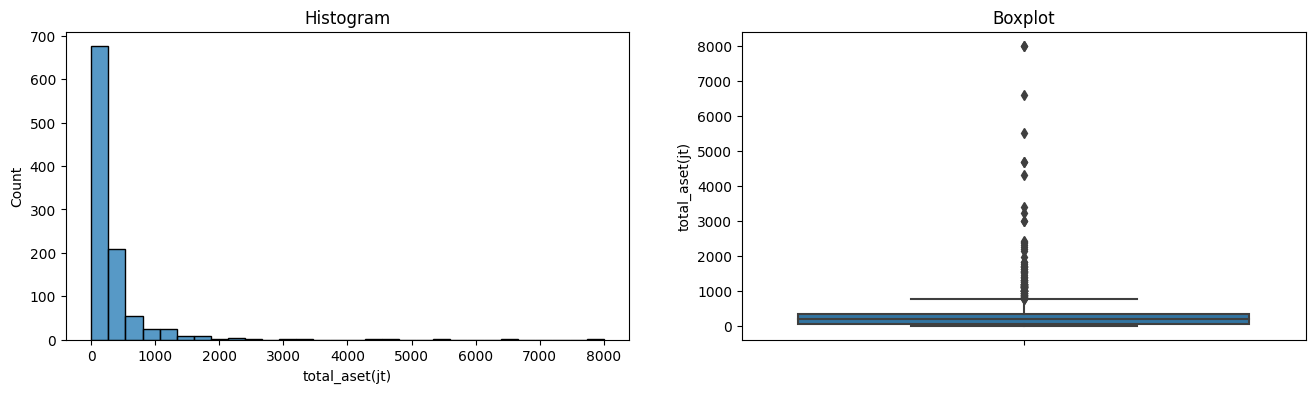

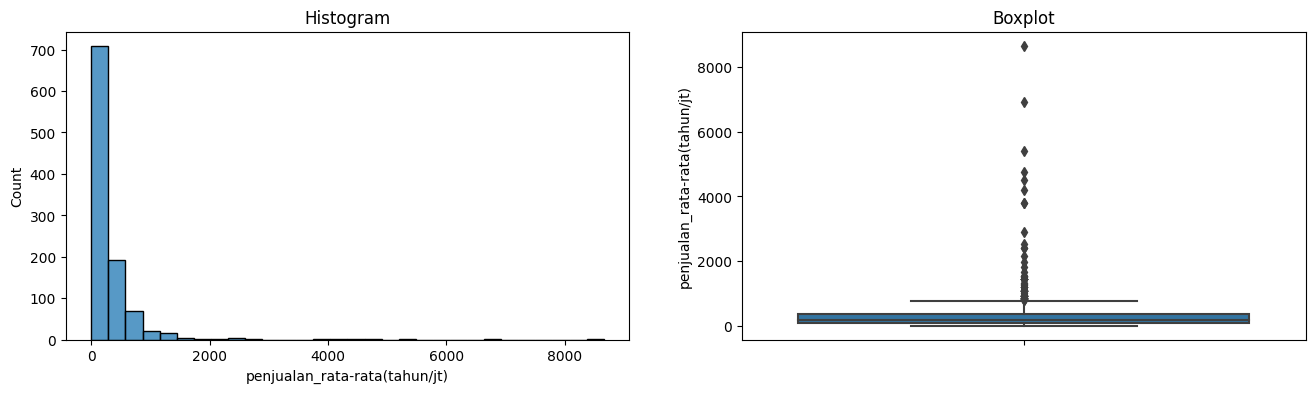

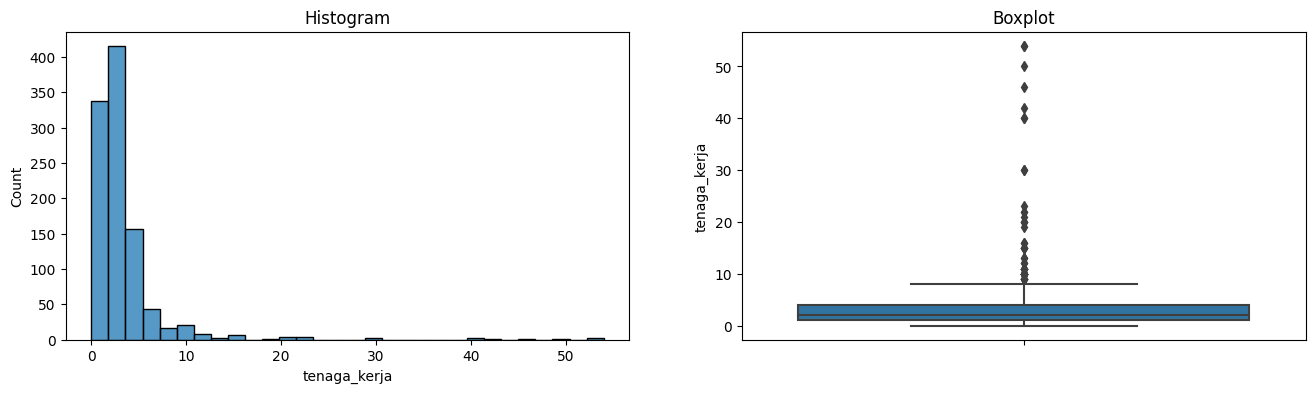

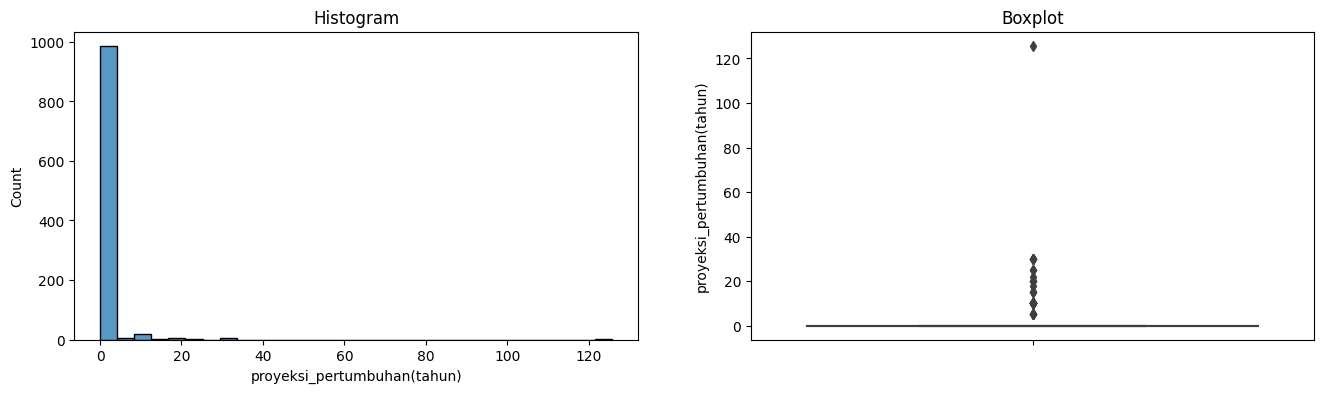

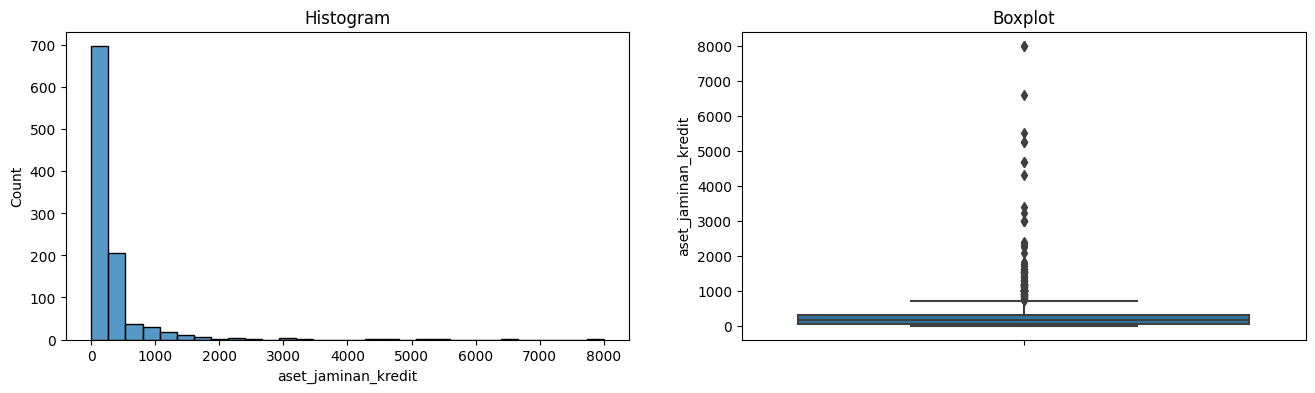

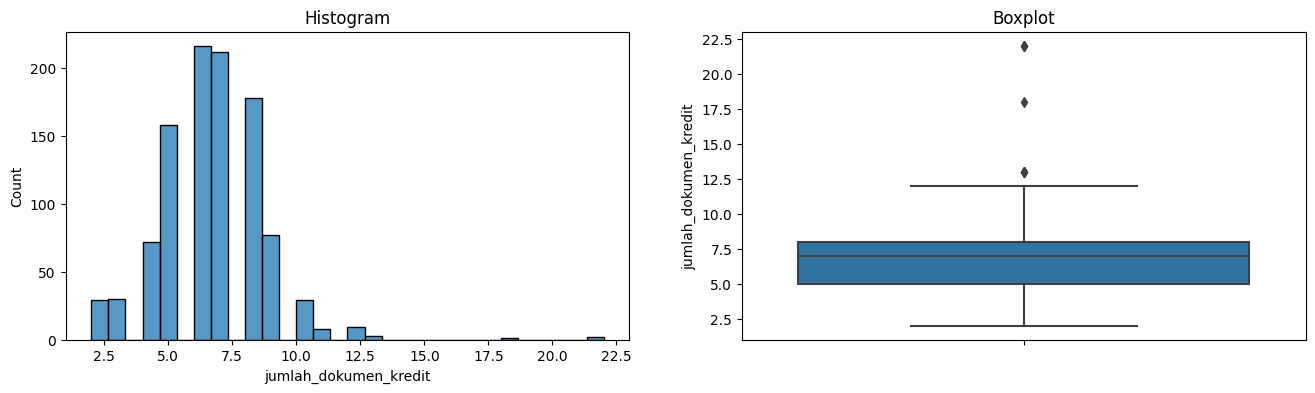

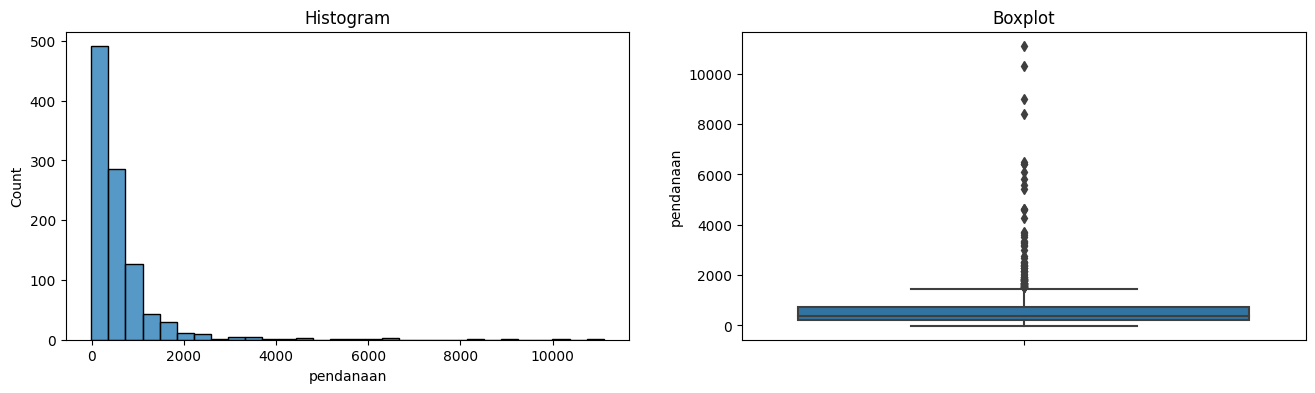

In [110]:
diagnostic_plots(df, 'total_aset(jt)')
diagnostic_plots(df, 'penjualan_rata-rata(tahun/jt)')
diagnostic_plots(df, 'tenaga_kerja')
diagnostic_plots(df, 'proyeksi_pertumbuhan(tahun)')
diagnostic_plots(df, 'aset_jaminan_kredit')
diagnostic_plots(df, 'jumlah_dokumen_kredit')
diagnostic_plots(df, 'pendanaan')

<ipython-input-111-0d1820ed995c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


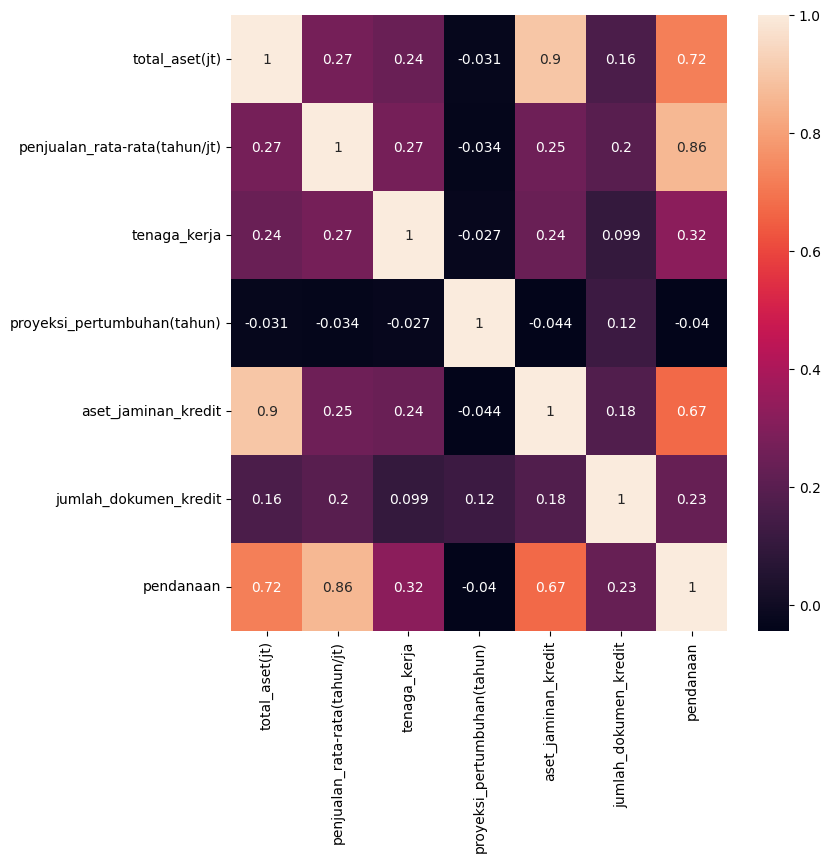

In [111]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [112]:
df = df[['total_aset(jt)',	'penjualan_rata-rata(tahun/jt)',	'tenaga_kerja',	'aset_jaminan_kredit',	'jumlah_dokumen_kredit',	'pendanaan']]

In [113]:
df

,total_aset(jt),penjualan_rata-rata(tahun/jt),tenaga_kerja,aset_jaminan_kredit,jumlah_dokumen_kredit,pendanaan
0,361.0,400.0,1,0.0,5,742.784482
1,44.6,576.0,1,15.0,3,736.831780
2,15.3,36.0,1,30.0,6,66.510918
3,125.8,75.6,3,92.0,12,226.430582
4,218.0,84.0,2,39.0,7,261.417527
...,...,...,...,...,...,...
1020,132.0,75.0,1,132.0,5,190.192815
1021,200.0,80.0,2,200.0,6,253.113620
1022,90.0,500.0,5,90.0,4,675.905274
1023,50.0,60.0,2,50.0,6,116.475490


In [114]:
new = df.drop(columns=["pendanaan"])

In [115]:
# Separating the Feature and Labels
X = new
y = df["pendanaan"]


In [116]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [117]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(5,),kernel_initializer='normal'),
    tf.keras.layers.Dense(32, activation='relu',kernel_initializer='normal'),
    tf.keras.layers.Dense(1,kernel_initializer='normal')
])

In [118]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='mape',
                               patience=10,
                               min_delta=0.001
)

In [119]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')
        target_accuracy = 0.97
        target_val_accuracy = 0.97

        if accuracy and accuracy > target_accuracy and val_accuracy and val_accuracy > target_val_accuracy:
            print("\n Target telah dicapai \n Proses selesai.")
            self.model.stop_training = True

callback = Callback()

In [120]:
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=2e-5)

model.compile(
    loss='mse',
    optimizer=optimizer, metrics=['mape']
)

In [121]:
models = model.fit(X, y, epochs=1500, callbacks=[early_stopping])

Epoch 1/1500
32/32 [==============================] - 0s 1ms/step - loss: 1289122.5000 - mape: 100.3507
Epoch 2/1500
32/32 [==============================] - 0s 1ms/step - loss: 1287786.6250 - mape: 100.2924
Epoch 3/1500
32/32 [==============================] - 0s 1ms/step - loss: 1286466.1250 - mape: 100.2415
Epoch 4/1500
32/32 [==============================] - 0s 1ms/step - loss: 1285245.3750 - mape: 100.1882
Epoch 5/1500
32/32 [==============================] - 0s 1ms/step - loss: 1284076.2500 - mape: 100.1411
Epoch 6/1500
32/32 [==============================] - 0s 1ms/step - loss: 1282912.1250 - mape: 100.0921
Epoch 7/1500
32/32 [==============================] - 0s 1ms/step - loss: 1281729.8750 - mape: 100.0431
Epoch 8/1500
32/32 [==============================] - 0s 1ms/step - loss: 1280585.0000 - mape: 99.9976
Epoch 9/1500
32/32 [==============================] - 0s 1ms/step - loss: 1279360.6250 - mape: 99.9459
Epoch 10/1500
32/32 [==============================] - 0s 1ms/step

In [122]:
df

,total_aset(jt),penjualan_rata-rata(tahun/jt),tenaga_kerja,aset_jaminan_kredit,jumlah_dokumen_kredit,pendanaan
0,361.0,400.0,1,0.0,5,742.784482
1,44.6,576.0,1,15.0,3,736.831780
2,15.3,36.0,1,30.0,6,66.510918
3,125.8,75.6,3,92.0,12,226.430582
4,218.0,84.0,2,39.0,7,261.417527
...,...,...,...,...,...,...
1020,132.0,75.0,1,132.0,5,190.192815
1021,200.0,80.0,2,200.0,6,253.113620
1022,90.0,500.0,5,90.0,4,675.905274
1023,50.0,60.0,2,50.0,6,116.475490


In [123]:
model.predict(np.array([[132.0,	75.0,	1,	132.0,	5]]))

1/1 [==============================] - 0s 36ms/step


array([[196.32756]], dtype=float32)

In [124]:
from sklearn import metrics

In [125]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [126]:
metrics.r2_score(y_test, y_pred)

0.9998908365577758

In [127]:
metrics.r2_score(y_test, y_pred)

0.9998908365577758

In [128]:
import pickle
# open a file, where you ant to store the data
file = open('pendanaan.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

In [129]:
model = open('pendanaan.pkl','rb')
pendanaan = pickle.load(model)

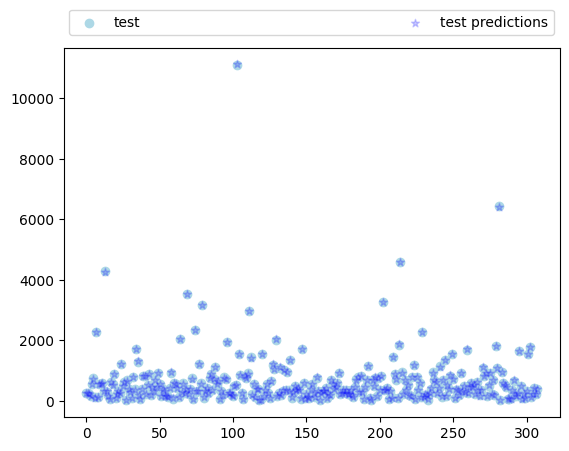

<Figure size 1280x1280 with 0 Axes>

In [130]:
x = [i for i in range(len(y_test))]
plt.scatter(x, y_test, label='test',color='lightblue', alpha=1)
plt.scatter(x, y_pred, label='test predictions', color='blue', alpha=0.2,marker='*')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.4)
plt.figure(figsize=(16, 16), dpi=80)
plt.show()

In [131]:
y_prediction = pendanaan.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [132]:
metrics.r2_score(y_test, y_prediction)

0.9998908365577758